<center><img src="./images/logo_fmkn.png" width=300 style="display: inline-block;"></center> 

## Машинное обучение
### Семинар 11. Кластеризация

<br />
<br />
25 ноября 2021

### Подготовим датасеты для кластеризации

In [17]:
import numpy as np
from sklearn import datasets

np.random.seed(10)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [18]:
datasets = [
    ("Noisy Circles", noisy_circles),
    ("Noisy Moons", noisy_moons),
    ("Varied", varied),
    ("Anisotropic", aniso),
    ("Blobs", blobs),
    ("No Structure", no_structure)]

### Отобразим эти датасеты

In [3]:
import matplotlib.pyplot as plt
import matplotlib

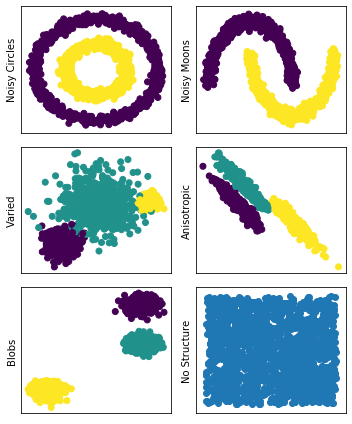

In [4]:
fig, gs = plt.figure(figsize=(5, 6)), matplotlib.gridspec.GridSpec(3,2)
for i, (name, (X, y)) in enumerate(datasets):
    plot = fig.add_subplot(gs[i])
    plot.scatter(X[:,0], X[:,1], c=y)
    plot.set_ylabel(name)
    plot.set_xticks([])
    plot.set_yticks([])
fig.tight_layout()

### K-means

In [6]:
from sklearn.cluster import KMeans

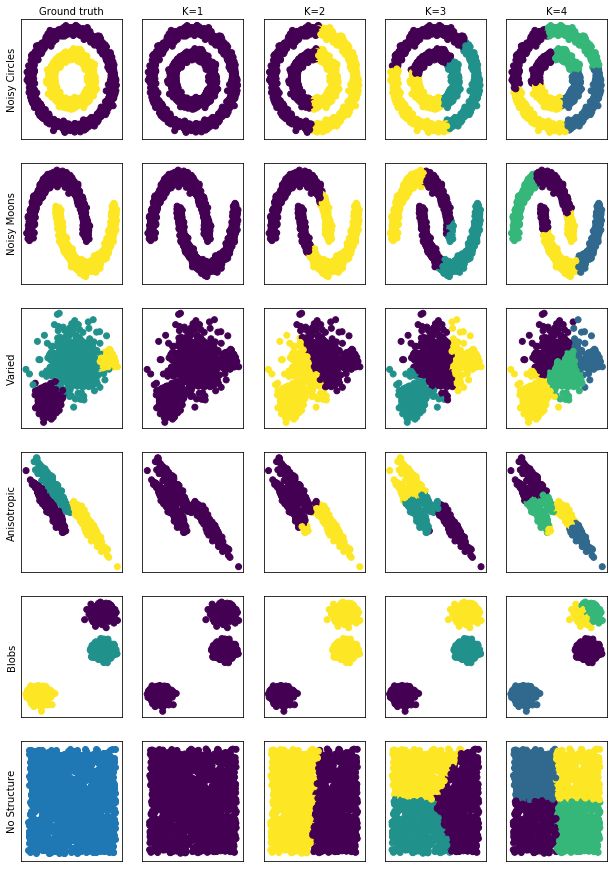

In [6]:
max_clusters = 4
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, max_clusters + 1)

for g_x, n_clusters in enumerate(range(max_clusters + 1)):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if n_clusters == 0:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = KMeans(n_clusters=n_clusters, random_state=44)
            model.fit(X)
      
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"K={n_clusters}")


Varied


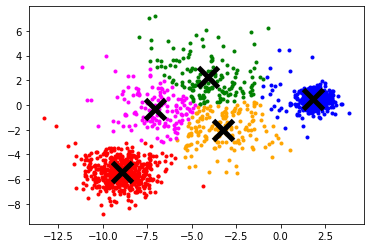

In [11]:
colors = ['blue', 'red', 'green', 'orange', 'magenta', 'black', 'cyan', 'purple']

model = KMeans(n_clusters=5, random_state=44)
name, (X, y) = datasets[2]
model.fit(X)
print(name)
for i in np.unique(model.labels_):
    _ = plt.plot(X[model.labels_ == i, 0], 
                 X[model.labels_ == i, 1], '.', color=colors[i],)
    _ = plt.plot([model.cluster_centers_[i][0]], 
                 [model.cluster_centers_[i][1]], 'x', c="black", markersize=20, markeredgewidth=5)

### DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

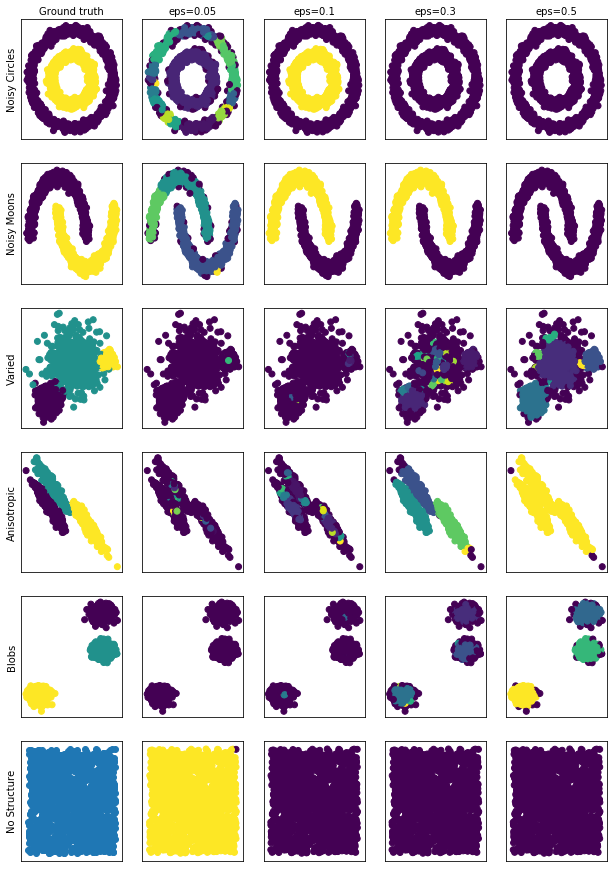

In [20]:
epss = [None, 0.05, 0.1, 0.3, 0.5]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(epss))

for g_x, eps in enumerate(epss):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not eps:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = DBSCAN(eps=eps, min_samples=5, metric="euclidean")
            model.fit(X)

            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"eps={eps}")

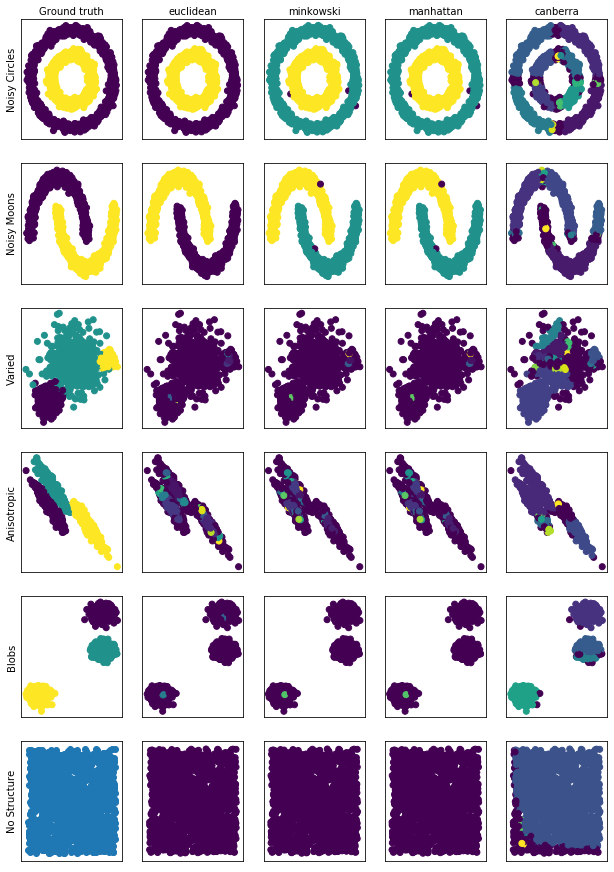

In [21]:
metrics = [None, "euclidean", "minkowski", "manhattan", "canberra"]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(metrics))

for g_x, metric in enumerate(metrics):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not metric:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = DBSCAN(eps=0.1, min_samples=5, metric=metric, p=1)
            model.fit(X)

            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"{metric}")

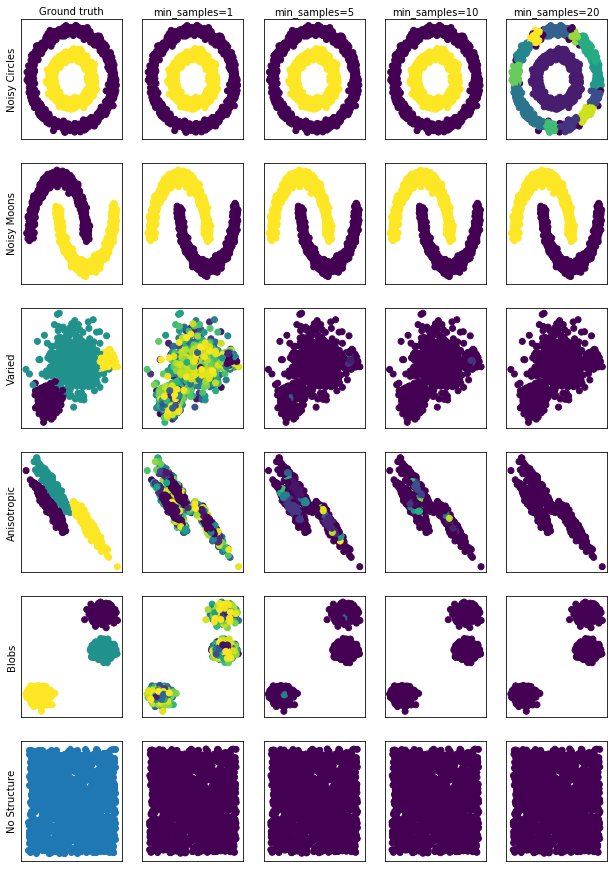

In [22]:
mss = [None, 1, 5, 10, 20]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(mss))

for g_x, min_samples in enumerate(mss):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not min_samples:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = DBSCAN(eps=0.1, min_samples=min_samples, metric="euclidean")
            model.fit(X)

            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"min_samples={min_samples}")

### Иерархическая кластеризация

In [23]:
from sklearn.cluster import AgglomerativeClustering

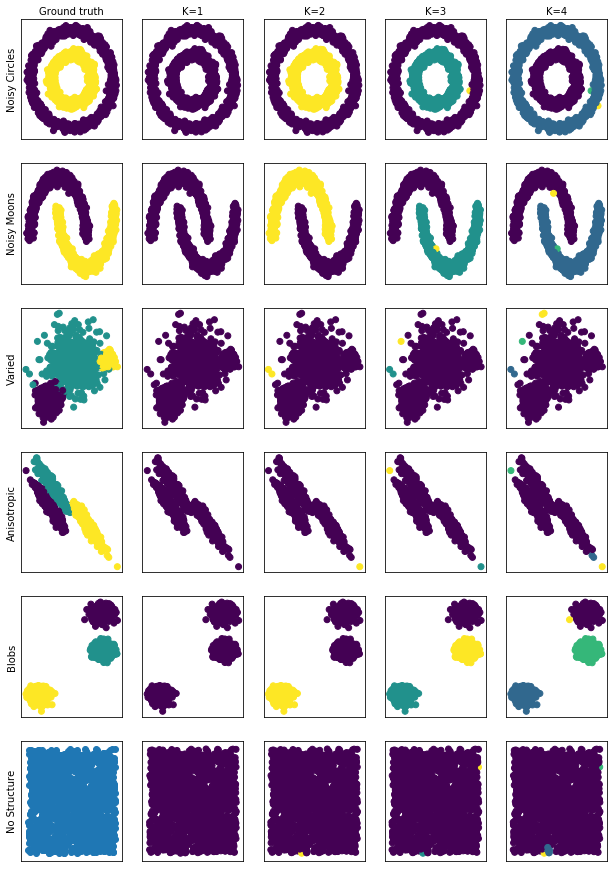

In [24]:
max_clusters = 4
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, max_clusters + 1)

for g_x, n_clusters in enumerate(range(max_clusters + 1)):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if n_clusters == 0:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, affinity='l1', linkage='single')
            model.fit(X)
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"K={n_clusters}")

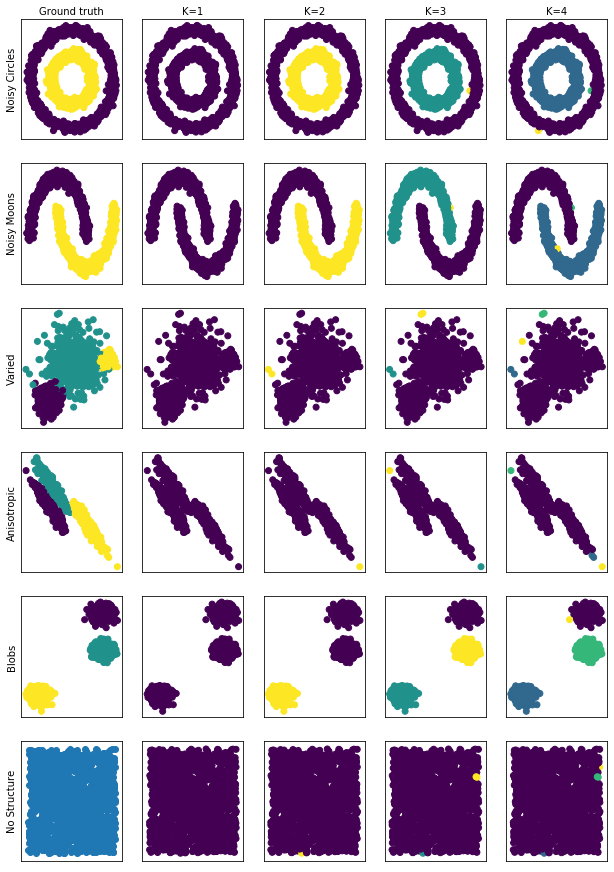

In [16]:
max_clusters = 4
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, max_clusters + 1)

for g_x, n_clusters in enumerate(range(max_clusters + 1)):
    for g_y, (name, (X, y)) in enumerate(datasets):
        plot = fig.add_subplot(gs[g_y, g_x])

        if n_clusters == 0:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='single')
            model.fit(X)
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"K={n_clusters}")

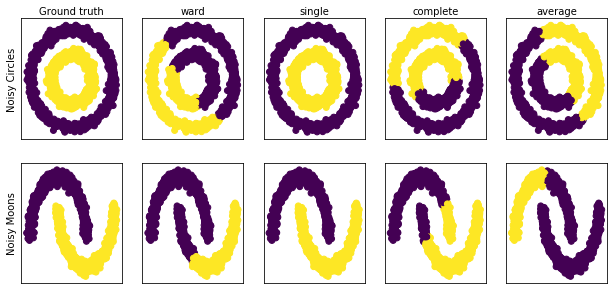

In [25]:
linkages = [None, "ward", "single", "complete", "average"]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(linkages))

for g_x, linkage in enumerate(linkages):
    for g_y, (name, (X, y)) in enumerate(datasets[:2]):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not linkage:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage=linkage)
            model.fit(X)
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"{linkage}")

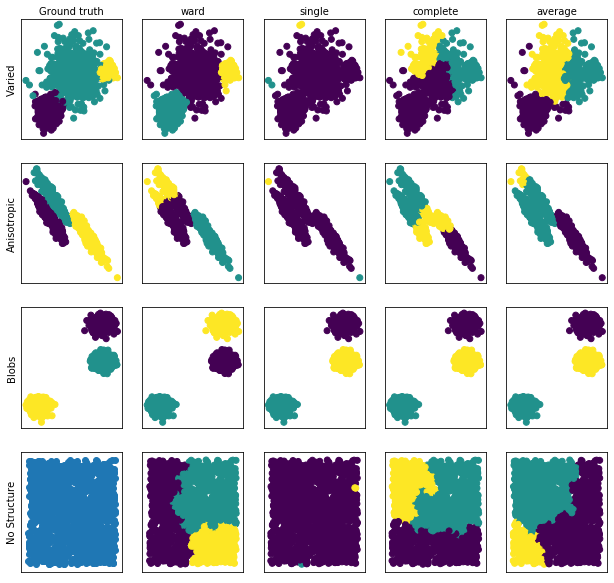

<Figure size 756x1116 with 0 Axes>

In [30]:
linkages = [None, "ward", "single", "complete", "average"]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(linkages))

for g_x, linkage in enumerate(linkages):
    for g_y, (name, (X, y)) in enumerate(datasets[2:]):
        plot = fig.add_subplot(gs[g_y, g_x])

        if not linkage:
            plot.scatter(X[:,0], X[:,1], c=y)
            plot.set_xticks([])
            plot.set_yticks([])
            plot.set_ylabel(name)
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel("Ground truth")
        else:
            model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=linkage)
            model.fit(X)
            plot.scatter(X[:,0], X[:,1], c=model.labels_)
            plot.set_xticks([])
            plot.set_yticks([])
            if g_y == 0:
                plot.xaxis.set_label_position('top') 
                plot.set_xlabel(f"{linkage}")
                linkages = ["ward", "single", "complete", "average"]
fig, gs = plt.figure(figsize=(10.5, 15.5)), matplotlib.gridspec.GridSpec(6, len(linkages))


Сравнение разных алгоритмов кластеризации в sklearn: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html.

### Self-training

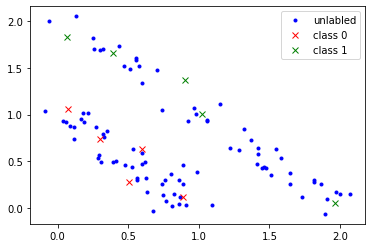

In [26]:
np.random.seed(10)
l = 50
X_1 = np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)
X_2 = 2*np.random.dirichlet([1e-0, 1e-0], size = l) \
      + 1e-1*np.random.randn(l, 2)

U = np.vstack([X_1[:45], X_2[:45]])
Y = np.hstack([np.zeros(len(X_1[45:]), dtype=int), 
               np.ones(len(X_2[45:]), dtype=int)])
X = np.vstack([X_1[45:], X_2[45:]])


_ = plt.plot(U[:, 0], U[:, 1], '.', color=colors[0], label='unlabled')
for i in np.unique(Y):
    _ = plt.plot(X[Y==i, 0], X[Y==i, 1], 'x', color=colors[i+1], label='class {}'.format(i))
    
plt.legend(loc='best')
plt.show()

In [29]:
from sklearn.svm import SVC

threshold = 0.85
models = []
datas = []
used_indexes = set()
classes = np.array([], dtype=int)

for i in range(16):
    X_new = np.vstack([X, U[list(used_indexes)]])
    Y_new = np.hstack([Y, classes[list(used_indexes)]])
    datas.append((X_new, Y_new, list(used_indexes), list(classes)))
    models.append(SVC(probability=True, kernel='linear').fit(X_new, Y_new))

    probas = models[-1].predict_proba(U)
    classes = np.array(models[-1].predict(U), dtype=int)
    
    used_indexes |= set(np.where(np.max(probas, axis=1) > threshold)[0])

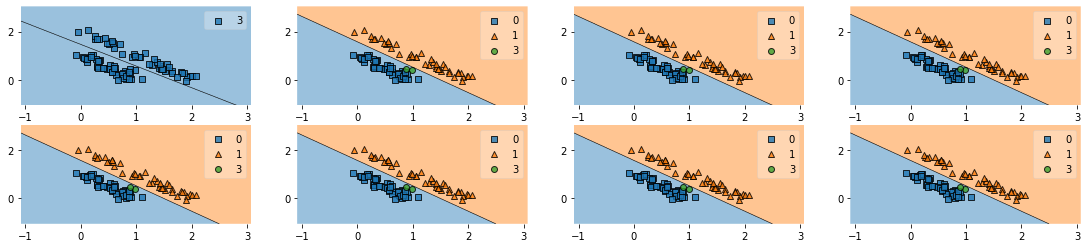

In [31]:
from mlxtend.plotting import plot_decision_regions

fig, gs = plt.figure(figsize=(19,4)), matplotlib.gridspec.GridSpec(2, 4)

ax = []
factor = 2
for i in range(8):
    ax.append(fig.add_subplot(gs[i]))
    X_plot = U
    Y_plot = 3*np.ones(len(U), dtype=int)
    Y_plot[datas[factor*i][2]] = classes[datas[factor*i][2]]
    plot_decision_regions(X_plot, Y_plot, models[factor*i], ax=ax[i])

plt.show()

In [21]:
from sklearn.tree import DecisionTreeClassifier

threshold = 0.85
models = []
datas = []
used_indexes = set()
classes = np.array([], dtype=int)

for i in range(16):
    X_new = np.vstack([X, U[list(used_indexes)]])
    Y_new = np.hstack([Y, classes[list(used_indexes)]])
    datas.append((X_new, Y_new, list(used_indexes), list(classes)))
    models.append(DecisionTreeClassifier().fit(X_new, Y_new))

    probas = models[-1].predict_proba(U)
    classes = np.array(models[-1].predict(U), dtype=int)
    
    used_indexes |= set(np.where(np.max(probas, axis=1) > threshold)[0])

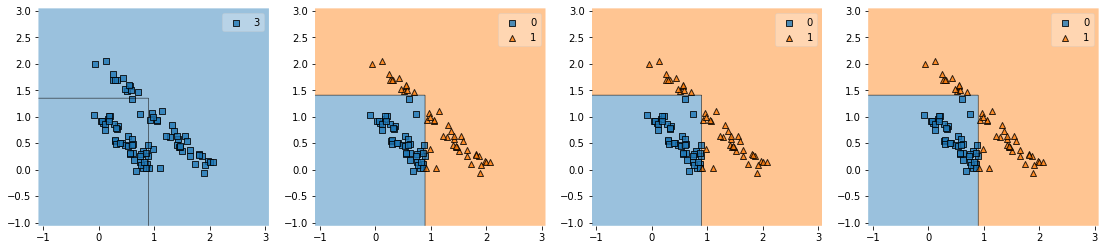

In [22]:
fig, gs = plt.figure(figsize=(19,4)), matplotlib.gridspec.GridSpec(1, 4)

ax = []
factor = 2
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))
    X_plot = U
    Y_plot = 3*np.ones(len(U), dtype=int)
    Y_plot[datas[factor*i][2]] = classes[datas[factor*i][2]]
    plot_decision_regions(X_plot, Y_plot, models[factor*i], ax=ax[i])

plt.show()

In [23]:
threshold = 0.85
models = []
datas = []
used_indexes = set()
classes = np.array([], dtype=int)

for i in range(16):
    X_new = np.vstack([X, U[list(used_indexes)]])
    Y_new = np.hstack([Y, classes[list(used_indexes)]])
    datas.append((X_new, Y_new, list(used_indexes), list(classes)))
    models.append(SVC(probability=True, kernel='rbf').fit(X_new, Y_new))

    probas = models[-1].predict_proba(U)
    classes = np.array(models[-1].predict(U), dtype=int)
    
    used_indexes |= set(np.where(np.max(probas, axis=1) > threshold)[0])

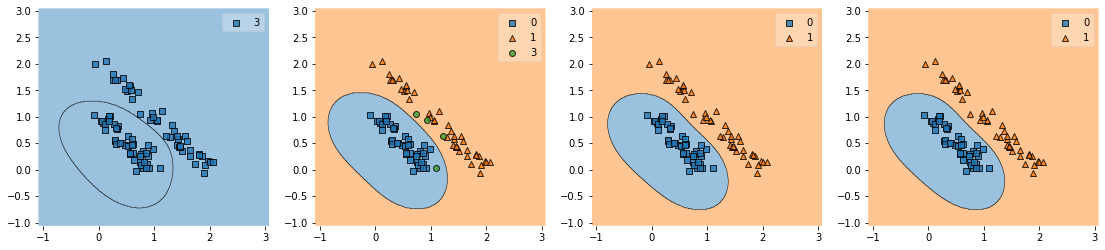

In [24]:
fig, gs = plt.figure(figsize=(19,4)), matplotlib.gridspec.GridSpec(1, 4)

ax = []
factor = 2
for i in range(4):
    ax.append(fig.add_subplot(gs[i]))
    X_plot = U
    Y_plot = 3*np.ones(len(U), dtype=int)
    Y_plot[datas[factor*i][2]] = classes[datas[factor*i][2]]
    plot_decision_regions(X_plot, Y_plot, models[factor*i], ax=ax[i])

plt.show()

### Co-learning

In [33]:
threshold = 0.75
models_1 = []
models_2 = []
datas_1 = []
datas_2 = []
used_indexes_1 = set()
used_indexes_2 = set()

classes_1 = np.array([], dtype=int)
classes_2 = np.array([], dtype=int)

for i in range(16):
    X1_new = np.vstack([X, U[list(used_indexes_2)]])
    Y1_new = np.hstack([Y, classes_2[list(used_indexes_2)]])

    X2_new = np.vstack([X, U[list(used_indexes_1)]])
    Y2_new = np.hstack([Y, classes_1[list(used_indexes_1)]])
    datas_1.append((X2_new, Y2_new, list(used_indexes_2), list(classes_2)))
    datas_2.append((X1_new, Y1_new, list(used_indexes_1), list(classes_1)))

    models_1.append(SVC(probability=True, kernel='linear').fit(X1_new, Y1_new))
    models_2.append(SVC(probability=True, kernel='rbf').fit(X2_new, Y2_new))
    

    probas = models_1[-1].predict_proba(U)
    classes_1 = np.array(models_1[-1].predict(U), dtype=int)
    
    used_indexes_1 |= set(np.where(np.max(probas, axis=1) > threshold)[0])

    probas = models_2[-1].predict_proba(U)
    classes_2 = np.array(models_2[-1].predict(U), dtype=int)
    
    used_indexes_2 |= set(np.where(np.max(probas, axis=1) > threshold)[0])

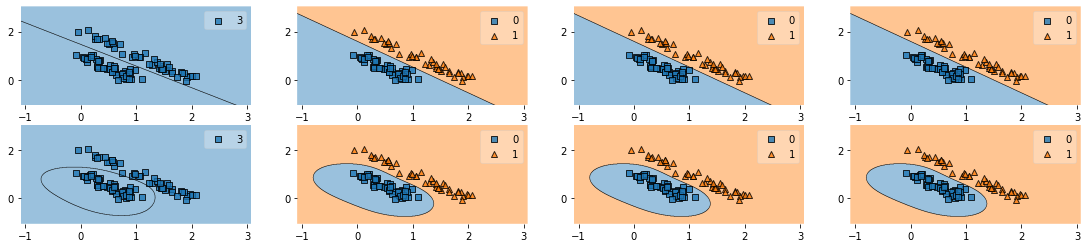

In [34]:
fig, gs = plt.figure(figsize=(19,4)), matplotlib.gridspec.GridSpec(2, 4)

ax = []
factor = 2

for y, (models, datas) in enumerate([(models_1, datas_1), (models_2, datas_2)]):
    for i in range(4):
        ax.append(fig.add_subplot(gs[y, i]))
        X_plot = U
        Y_plot = 3*np.ones(len(U), dtype=int)
        Y_plot[datas[factor*i][2]] = classes[datas[factor*i][2]]
        plot_decision_regions(X_plot, Y_plot, models[factor*i], ax=ax[-1])

plt.show()

## Ещё примеры обучения без учителя

### Снижение размерности 

* PCA - линейная модель (предполагает, что данные — искаженный Гаусс)
* kernelPCA — PCA с ядром
* tSNE — вводим вероятностную меру: пара вероятней, если расстояние между объектами меньше. Обучаем отображение из исходных фичей в новые, так что KL расстояние между вероятностными распределениями было минимально
* uMAP — предполагаем, что данные равномерно распределены по поверхности Риманова многообразия и подбираем многообразие

### Создание признаков
* Снижение размерностей — частный случай
* Нейронные сети — разбиваем на две части: первая — создание признаков, вторая — решает задачу. Обучаем первую на задаче, где легко добыть метки

Созданные признаки очень популярны с методом опорных векторов и в глубоком обучении.

### Создание данных
* PCA-пример ещё будет
* Нейронные сети (VAE, GAN, FLOW, SYLEGAN) во второй части курса

Созданные данные можно использовать для обучения/адаптации модели к новым распределениям данных.